# 11章

## 11.1

In [1]:
d1 <- readr::read_csv("../samplecode/Rで学ぶ統計学入門図版作成用/table11-1.csv")

Parsed with column specification:
cols(
  x = col_double(),
  y = col_double(),
  block = col_character()
)


In [2]:
head(d1)

x,y,block
1.0,9.0,a
1.5,8.3,a
2.1,10.5,a
2.7,9.7,a
3.4,10.2,a
3.9,11.8,a


In [3]:
str(d1)

Classes 'tbl_df', 'tbl' and 'data.frame':	18 obs. of  3 variables:
 $ x    : num  1 1.5 2.1 2.7 3.4 3.9 3 4.7 3.8 6 ...
 $ y    : num  9 8.3 10.5 9.7 10.2 11.8 6.9 7.3 6.2 8.9 ...
 $ block: chr  "a" "a" "a" "a" ...
 - attr(*, "spec")=List of 2
  ..$ cols   :List of 3
  .. ..$ x    : list()
  .. .. ..- attr(*, "class")= chr  "collector_double" "collector"
  .. ..$ y    : list()
  .. .. ..- attr(*, "class")= chr  "collector_double" "collector"
  .. ..$ block: list()
  .. .. ..- attr(*, "class")= chr  "collector_character" "collector"
  ..$ default: list()
  .. ..- attr(*, "class")= chr  "collector_guess" "collector"
  ..- attr(*, "class")= chr "col_spec"


In [4]:
library(ggplot2)

Warning message:
"package 'ggplot2' was built under R version 3.3.3"

In [5]:
library(dplyr)

Warning message:
"package 'dplyr' was built under R version 3.3.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [6]:
library(tidyr)

Warning message:
"package 'tidyr' was built under R version 3.3.3"

In [8]:
options(repr.plot.width = 4, repr.plot.height=4)

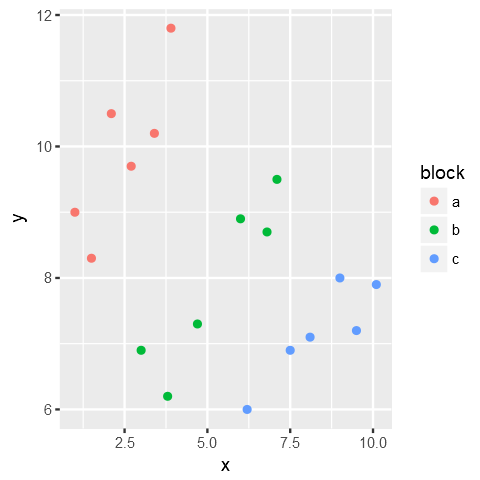

In [9]:
ggplot(data = d1, mapping=aes(x, y, group=block, colour=block)) + geom_point()

In [10]:
library("lme4")

Loading required package: Matrix

Attaching package: 'Matrix'

The following object is masked from 'package:tidyr':

    expand


Attaching package: 'lme4'

The following object is masked from 'package:stats':

    sigma



`glmer()` を `family=gaussian (identity link)` を使うのなら `lmer()` を使う

In [11]:
res.d1.1 <- glmer(y ~ x + (1 | block), data = d1, family=gaussian(link=identity))

Warning message in glmer(y ~ x + (1 | block), data = d1, family = gaussian(link = identity)):
"calling glmer() with family=gaussian (identity link) as a shortcut to lmer() is deprecated; please call lmer() directly"

In [12]:
res.d1.2 <- lmer(y ~ x + (1 | block), data=d1)

In [14]:
summary(res.d1.1)

Linear mixed model fit by REML ['lmerMod']
Formula: y ~ x + (1 | block)
   Data: d1

REML criterion at convergence: 45.9

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.6493 -0.5949  0.1023  0.6671  1.5821 

Random effects:
 Groups   Name        Variance Std.Dev.
 block    (Intercept) 11.0023  3.3170  
 Residual              0.3631  0.6026  
Number of obs: 18, groups:  block, 3

Fixed effects:
            Estimate Std. Error t value
(Intercept)   4.8738     2.0063   2.429
x             0.6470     0.1085   5.962

Correlation of Fixed Effects:
  (Intr)
x -0.290

In [15]:
summary(res.d1.2)

Linear mixed model fit by REML ['lmerMod']
Formula: y ~ x + (1 | block)
   Data: d1

REML criterion at convergence: 45.9

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.6493 -0.5949  0.1023  0.6671  1.5821 

Random effects:
 Groups   Name        Variance Std.Dev.
 block    (Intercept) 11.0023  3.3170  
 Residual              0.3631  0.6026  
Number of obs: 18, groups:  block, 3

Fixed effects:
            Estimate Std. Error t value
(Intercept)   4.8738     2.0063   2.429
x             0.6470     0.1085   5.962

Correlation of Fixed Effects:
  (Intr)
x -0.290

## 11.2

In [1]:
d2 <- readr::read_csv("../samplecode/Rで学ぶ統計学入門図版作成用/table11-2.csv")

Parsed with column specification:
cols(
  ID = col_integer(),
  rep = col_integer(),
  y = col_integer(),
  x = col_integer()
)


In [17]:
head(d2)

ID,rep,y,x
1,1,0,1
1,2,0,1
1,3,0,1
1,4,1,1
2,1,0,1
2,2,1,1


In [18]:
str(d2)

Classes 'tbl_df', 'tbl' and 'data.frame':	40 obs. of  4 variables:
 $ ID : int  1 1 1 1 2 2 2 2 3 3 ...
 $ rep: int  1 2 3 4 1 2 3 4 1 2 ...
 $ y  : int  0 0 0 1 0 1 0 0 1 0 ...
 $ x  : int  1 1 1 1 1 1 1 1 2 2 ...
 - attr(*, "spec")=List of 2
  ..$ cols   :List of 4
  .. ..$ ID : list()
  .. .. ..- attr(*, "class")= chr  "collector_integer" "collector"
  .. ..$ rep: list()
  .. .. ..- attr(*, "class")= chr  "collector_integer" "collector"
  .. ..$ y  : list()
  .. .. ..- attr(*, "class")= chr  "collector_integer" "collector"
  .. ..$ x  : list()
  .. .. ..- attr(*, "class")= chr  "collector_integer" "collector"
  ..$ default: list()
  .. ..- attr(*, "class")= chr  "collector_guess" "collector"
  ..- attr(*, "class")= chr "col_spec"


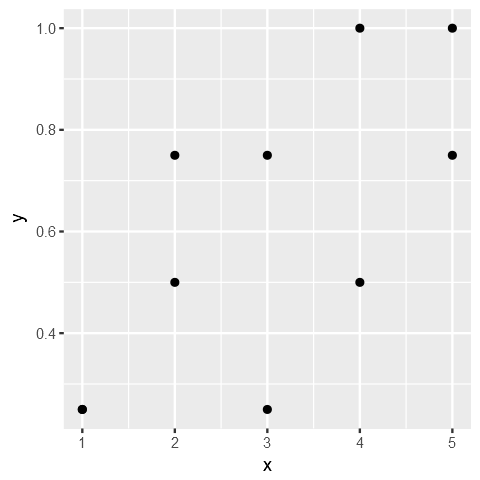

In [22]:
d2 %>% group_by(ID) %>% summarise_at(.vars = vars(y, x), .funs = funs(mean)) %>% 
    ungroup() %>% ggplot(aes(x, y)) + geom_point()

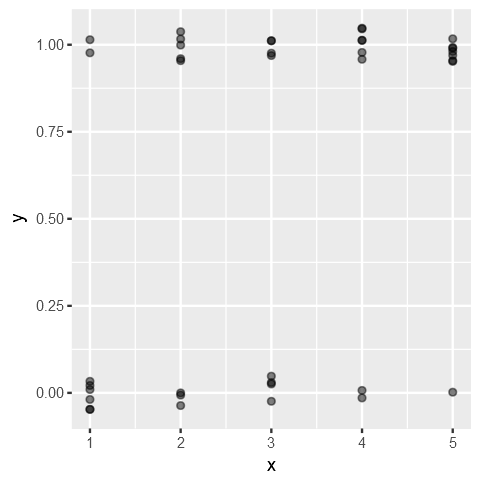

In [64]:
gp.d2 <- d2 %>% ggplot(aes(x, y)) + geom_jitter(width=0, height = 0.05, alpha=0.5) 
gp.d2

In [3]:
library("glmmML")

In [35]:
res.d2.1 <- glmer(y ~ x + (1 | ID), data=d2, family=binomial(link = logit))

Random effects の値が本文と違う

In [36]:
summary(res.d2.1)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: y ~ x + (1 | ID)
   Data: d2

     AIC      BIC   logLik deviance df.resid 
    53.2     58.3    -23.6     47.2       37 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.4104 -0.7366  0.4149  0.7849  1.4851 

Random effects:
 Groups Name        Variance  Std.Dev. 
 ID     (Intercept) 1.985e-18 1.409e-09
Number of obs: 40, groups:  ID, 10

Fixed effects:
            Estimate Std. Error z value Pr(>|z|)  
(Intercept)  -1.4286     0.8201  -1.742   0.0815 .
x             0.6376     0.2684   2.376   0.0175 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
  (Intr)
x -0.903

`glmmML()` のデフォルトは ラプラス近似．

`method="ghq"` すると，ガウス・エルミート積分法 

In [33]:
res.d2.2 <- glmmML(y ~ x, data=d2, cluster=ID, family=binomial(link=logit))

In [34]:
summary(res.d2.2)


Call:  glmmML(formula = y ~ x, family = binomial(link = logit), data = d2,      cluster = ID) 


               coef se(coef)      z Pr(>|z|)
(Intercept) -1.4285   0.8201 -1.742   0.0815
x            0.6376   0.2684  2.376   0.0175

Scale parameter in mixing distribution:  5.585e-05 gaussian 
Std. Error:                              0.7823 

        LR p-value for H_0: sigma = 0:  0.5 

Residual deviance: 47.2 on 37 degrees of freedom 	AIC: 53.2 


In [4]:
res.d2.2.ghq <- glmmML(y ~ x, data=d2, cluster=ID, family=binomial(link=logit), method="ghq")
summary(res.d2.2.ghq)


Call:  glmmML(formula = y ~ x, family = binomial(link = logit), data = d2,      cluster = ID, method = "ghq") 


               coef se(coef)      z Pr(>|z|)
(Intercept) -1.4285   0.8201 -1.742   0.0815
x            0.6376   0.2684  2.376   0.0175

Scale parameter in mixing distribution:  8.903e-05 gaussian 
Std. Error:                              0.7822 

        LR p-value for H_0: sigma = 0:  0.5 

Residual deviance: 47.2 on 37 degrees of freedom 	AIC: 53.2 


In [100]:
coef(res.d2.2)

(Intercept)           x 
 -1.4285074   0.6376393

In [101]:
d2.pred <- data.frame(x = seq(0, 5, 0.01)) %>% 
    mutate(y1 = 1 / (1 + exp(-(coef(summary(res.d2.1))["(Intercept)", "Estimate"] + 
                               coef(summary(res.d2.1))["x", "Estimate"] * x))), 
          y2 = 1 / (1 + exp(-(coef(res.d2.2)["(Intercept)"] + 
                               coef(res.d2.2)["x"] * x)))
          )
head(d2.pred)

x,y1,y2
0.00,0.1933185,0.1933314
0.01,0.1943148,0.1943277
0.02,0.1953150,0.1953280
0.03,0.1963191,0.1963321
0.04,0.1973272,0.1973402
0.05,0.1983391,0.1983522


In [102]:
gp.d2.pred <- d2.pred %>% gather(func, y, -x) %>% geom_line(data=., mapping=aes(x, y, group=func, linetype=func), alpha=0.5)
gp.d2.pred

mapping: x = x, y = y, group = func, linetype = func 
geom_line: na.rm = FALSE
stat_identity: na.rm = FALSE
position_identity 

In [83]:
options(repr.plot.width=5)

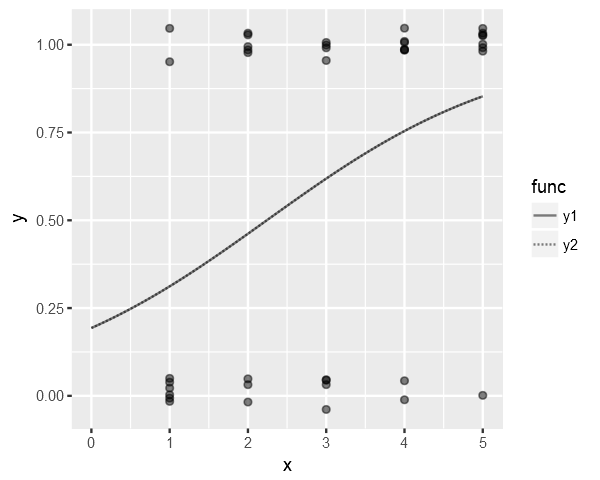

In [103]:
gp.d2 + gp.d2.pred

## 11.3

寄生蜂

In [85]:
d3 <- readr::read_csv("../samplecode/Rで学ぶ統計学入門図版作成用//table11-3.csv")

Parsed with column specification:
cols(
  mother = col_integer(),
  wt = col_double(),
  y = col_integer()
)


In [86]:
head(d3)

mother,wt,y
1,0.28,1
1,0.31,1
1,0.15,1
1,0.36,0
2,0.21,1
2,0.17,1


In [87]:
str(d3)

Classes 'tbl_df', 'tbl' and 'data.frame':	48 obs. of  3 variables:
 $ mother: int  1 1 1 1 2 2 2 2 3 3 ...
 $ wt    : num  0.28 0.31 0.15 0.36 0.21 0.17 0.16 0.41 0.22 0.45 ...
 $ y     : int  1 1 1 0 1 1 1 0 1 1 ...
 - attr(*, "spec")=List of 2
  ..$ cols   :List of 3
  .. ..$ mother: list()
  .. .. ..- attr(*, "class")= chr  "collector_integer" "collector"
  .. ..$ wt    : list()
  .. .. ..- attr(*, "class")= chr  "collector_double" "collector"
  .. ..$ y     : list()
  .. .. ..- attr(*, "class")= chr  "collector_integer" "collector"
  ..$ default: list()
  .. ..- attr(*, "class")= chr  "collector_guess" "collector"
  ..- attr(*, "class")= chr "col_spec"


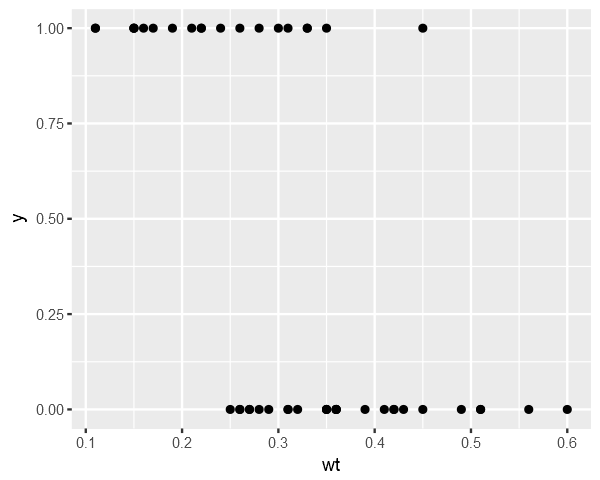

In [94]:
gp.d3 <- ggplot(d3, aes(wt, y)) + geom_point()
gp.d3

In [89]:
res.d3.1 <- glmer(cbind(y, 1-y) ~ wt + (1 | mother), data=d3, family=binomial(link=logit))

In [113]:
summary(res.d3.1)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: cbind(y, 1 - y) ~ wt + (1 | mother)
   Data: d3

     AIC      BIC   logLik deviance df.resid 
    43.9     49.6    -19.0     37.9       45 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-1.53558 -0.34452 -0.03234  0.15979  2.02210 

Random effects:
 Groups Name        Variance Std.Dev.
 mother (Intercept) 5.844    2.417   
Number of obs: 48, groups:  mother, 12

Fixed effects:
            Estimate Std. Error z value Pr(>|z|)  
(Intercept)    7.917      3.583   2.209   0.0271 *
wt           -28.326     11.930  -2.374   0.0176 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
   (Intr)
wt -0.968

In [91]:
res.d3.2 <- glmmML(cbind(y, 1-y) ~ wt, data=d3, cluster=mother, family=binomial(link=logit))

In [114]:
summary(res.d3.2)


Call:  glmmML(formula = cbind(y, 1 - y) ~ wt, family = binomial(link = logit),      data = d3, cluster = mother) 


              coef se(coef)      z Pr(>|z|)
(Intercept)   7.92    3.127  2.533  0.01130
wt          -28.34   10.081 -2.811  0.00494

Scale parameter in mixing distribution:  2.419 gaussian 
Std. Error:                              0.9151 

        LR p-value for H_0: sigma = 0:  0.01482 

Residual deviance: 37.95 on 45 degrees of freedom 	AIC: 43.95 


In [107]:
coef(summary(res.d3.1))

,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),7.91731,3.583376,2.209456,0.02714296
wt,-28.32612,11.929613,-2.374437,0.01757571


In [109]:
d3.pred <- data.frame(wt = seq(0, 0.6, 0.01)) %>% 
    mutate(y1 = 1 / (1 + exp(-(coef(summary(res.d3.1))["(Intercept)", "Estimate"] + 
                               coef(summary(res.d3.1))["wt", "Estimate"] * wt))), 
          y2 = 1 / (1 + exp(-(coef(res.d3.2)["(Intercept)"] + 
                               coef(res.d3.2)["wt"] * wt)))
          )
head(d3.pred)

wt,y1,y2
0.00,0.9996358,0.9996369
0.01,0.9995165,0.9995180
0.02,0.9993583,0.9993602
0.03,0.9991484,0.9991508
0.04,0.9988698,0.9988728
0.05,0.9985003,0.9985041


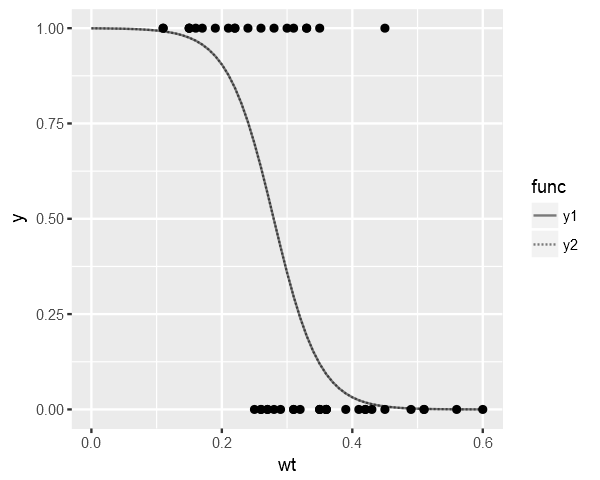

In [112]:
gp.d3.pred <- d3.pred %>% gather(func, y, -wt) %>% 
    geom_line(data=., mapping=aes(wt, y, group=func, linetype=func), alpha=0.5)
gp.d3 + gp.d3.pred

In [118]:
matrix(d3$y, nrow=4, ncol=12) %>% print()

     [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10] [,11] [,12]
[1,]    1    1    1    1    0    1    1    0    0     0     1     0
[2,]    1    1    1    1    1    0    0    0    0     0     0     0
[3,]    1    1    1    0    0    1    0    0    0     0     1     0
[4,]    0    0    1    0    0    0    1    0    0     0     1     0


`glm()` （過分散）

In [120]:
res.d3.3 <- glm(cbind(y, 1-y) ~ wt, family=binomial(link=logit), data=d3)

In [121]:
summary(res.d3.3)


Call:
glm(formula = cbind(y, 1 - y) ~ wt, family = binomial(link = logit), 
    data = d3)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.4340  -0.7094  -0.1906   0.6089   2.5033  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)    5.178      1.650   3.138 0.001700 ** 
wt           -18.371      5.486  -3.349 0.000811 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 65.203  on 47  degrees of freedom
Residual deviance: 42.677  on 46  degrees of freedom
AIC: 46.677

Number of Fisher Scoring iterations: 5


## 11.4 過分散

## 11.5 負の二項分布とそれを利用した事例の分析

In [122]:
d4 <- readr::read_csv("../samplecode/Rで学ぶ統計学入門図版作成用/table11-4.csv")

Parsed with column specification:
cols(
  wt = col_double(),
  flw = col_integer()
)


In [123]:
head(d4)

wt,flw
22.5,0
23.1,0
24.6,0
25.7,0
31.5,0
32.4,1


In [124]:
str(d4)

Classes 'tbl_df', 'tbl' and 'data.frame':	36 obs. of  2 variables:
 $ wt : num  22.5 23.1 24.6 25.7 31.5 32.4 33.3 36.2 36.8 37.2 ...
 $ flw: int  0 0 0 0 0 1 1 0 0 4 ...
 - attr(*, "spec")=List of 2
  ..$ cols   :List of 2
  .. ..$ wt : list()
  .. .. ..- attr(*, "class")= chr  "collector_double" "collector"
  .. ..$ flw: list()
  .. .. ..- attr(*, "class")= chr  "collector_integer" "collector"
  ..$ default: list()
  .. ..- attr(*, "class")= chr  "collector_guess" "collector"
  ..- attr(*, "class")= chr "col_spec"


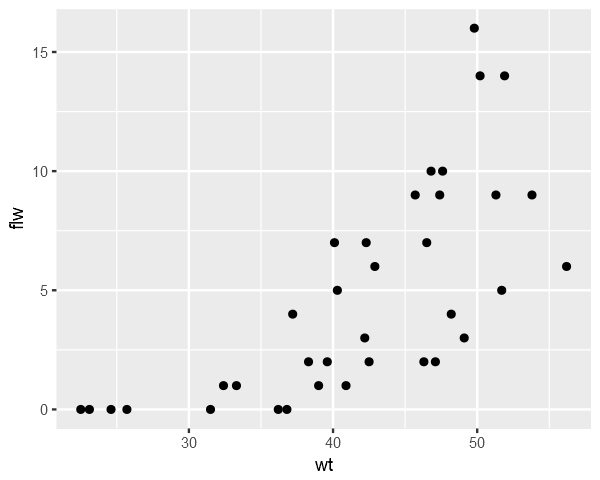

In [130]:
gp.d4 <- ggplot(d4, aes(wt, flw)) + geom_point()
gp.d4

In [125]:
res.d4 <- glm(flw ~ wt, data=d4, family=poisson)

In [134]:
summary(res.d4)


Call:
glm(formula = flw ~ wt, family = poisson, data = d4)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.7355  -1.2109  -0.4309   1.0893   2.5143  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -3.09129    0.59305  -5.213 1.86e-07 ***
wt           0.10365    0.01242   8.348  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 160.074  on 35  degrees of freedom
Residual deviance:  71.071  on 34  degrees of freedom
AIC: 172.48

Number of Fisher Scoring iterations: 5


過分散?: Residual deviance / degrees of freedom

In [135]:
71.071 / 34

[1] 2.090324

In [128]:
res.d4 %>% coef()

(Intercept)          wt 
 -3.0912884   0.1036538

In [131]:
d4.pred.1 <- data.frame(wt = seq(20, 60, 0.1)) %>% 
            mutate(flw = exp(coef(res.d4)["(Intercept)"] + coef(res.d4)["wt"] * wt))
head(d4.pred.1)

wt,flw
20.0,0.3612404
20.1,0.3650043
20.2,0.3688074
20.3,0.3726501
20.4,0.3765329
20.5,0.3804561


Warning message:
"Removed 13 rows containing missing values (geom_path)."

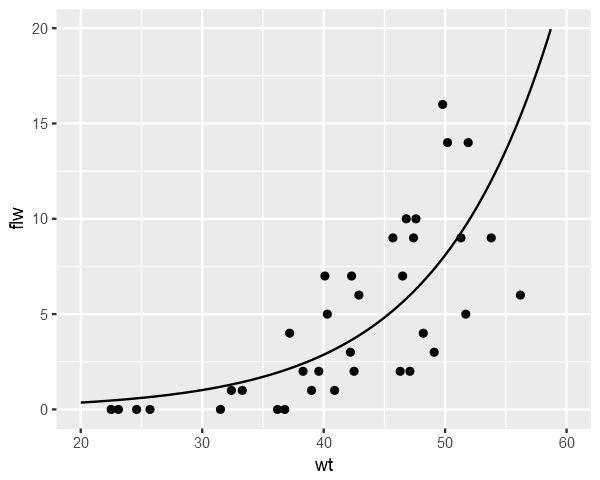

In [148]:
gp.d4.pred.1 <- geom_line(data=d4.pred.1, mapping=aes(wt, flw))
gp.d4 + gp.d4.pred.1 + scale_y_continuous(limits = c(0, 20))

In [141]:
library(MASS)


Attaching package: 'MASS'

The following object is masked from 'package:dplyr':

    select



In [143]:
res.d4.2 <- glm(flw ~ wt, data=d4, family=negative.binomial(1))

In [144]:
summary(res.d4.2)


Call:
glm(formula = flw ~ wt, family = negative.binomial(1), data = d4)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.3518  -0.6962  -0.1648   0.3445   1.1443  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -4.83195    0.80775  -5.982 9.09e-07 ***
wt           0.14220    0.01795   7.921 3.17e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for Negative Binomial(1) family taken to be 0.3906081)

    Null deviance: 39.998  on 35  degrees of freedom
Residual deviance: 16.441  on 34  degrees of freedom
AIC: 171.73

Number of Fisher Scoring iterations: 7


In [145]:
coef(res.d4.2)

(Intercept)          wt 
 -4.8319491   0.1422028

In [146]:
d4.pred.2 <- data.frame(wt = d4.pred.1$wt) %>% 
        mutate(flw = exp(coef(res.d4.2)["(Intercept)"] + coef(res.d4.2)["wt"] * wt))
head(d4.pred.2)

wt,flw
20.0,0.1369838
20.1,0.1389457
20.2,0.1409356
20.3,0.1429541
20.4,0.1450015
20.5,0.1470782


Warning message:
"Removed 50 rows containing missing values (geom_path)."

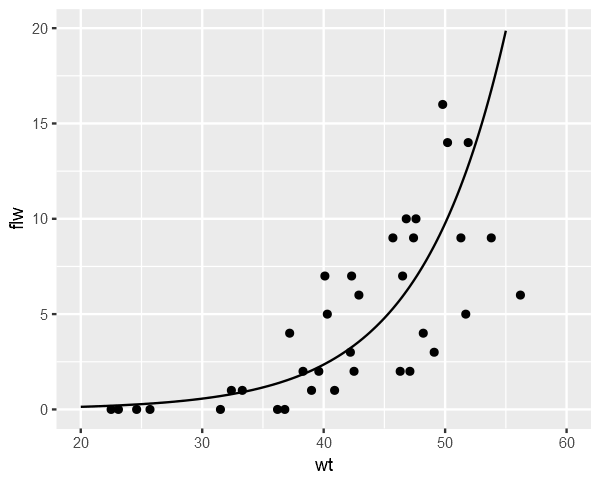

In [149]:
gp.d4.pred.2 <- geom_line(data=d4.pred.2, mapping=aes(wt, flw))
gp.d4 + gp.d4.pred.2 + scale_y_continuous(limits = c(0, 20))

In [150]:
res.d4.3 <- glm.nb(flw ~ wt, data=d4)

In [151]:
summary(res.d4.3)


Call:
glm.nb(formula = flw ~ wt, data = d4, init.theta = 4.57125751, 
    link = log)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.7783  -0.9535  -0.2519   0.7586   1.6619  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -3.99857    0.85085  -4.700 2.61e-06 ***
wt           0.12368    0.01839   6.725 1.76e-11 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for Negative Binomial(4.5713) family taken to be 1)

    Null deviance: 88.813  on 35  degrees of freedom
Residual deviance: 36.001  on 34  degrees of freedom
AIC: 161.72

Number of Fisher Scoring iterations: 1


              Theta:  4.57 
          Std. Err.:  2.21 

 2 x log-likelihood:  -155.722 

In [152]:
d4.pred.3 <- data.frame(wt = d4.pred.1$wt) %>% 
        mutate(flw = exp(coef(res.d4.3)["(Intercept)"] + coef(res.d4.3)["wt"] * wt))
head(d4.pred.3)

wt,flw
20.0,0.2176412
20.1,0.2203497
20.2,0.2230920
20.3,0.2258684
20.4,0.2286794
20.5,0.2315253


Warning message:
"Removed 35 rows containing missing values (geom_path)."

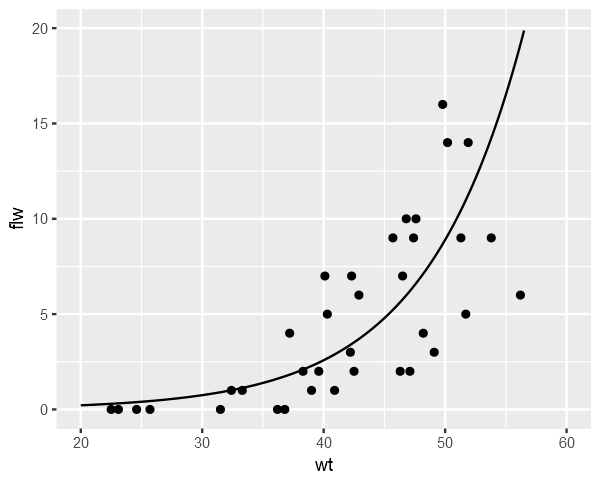

In [153]:
gp.d4.pred.3 <- geom_line(data=d4.pred.3, mapping=aes(wt, flw))
gp.d4 + gp.d4.pred.3 + scale_y_continuous(limits = c(0, 20))

疑似尤度

In [154]:
d5 <- readr::read_csv("../samplecode/Rで学ぶ統計学入門図版作成用/table11-5.csv")

Parsed with column specification:
cols(
  x = col_double(),
  y = col_integer()
)


In [155]:
head(d5)

x,y
1.7,4
1.9,3
2.8,12
3.3,6
3.7,15
3.9,13


In [156]:
str(d5)

Classes 'tbl_df', 'tbl' and 'data.frame':	14 obs. of  2 variables:
 $ x: num  1.7 1.9 2.8 3.3 3.7 3.9 4.1 4.3 4.6 4.7 ...
 $ y: int  4 3 12 6 15 13 25 15 12 35 ...
 - attr(*, "spec")=List of 2
  ..$ cols   :List of 2
  .. ..$ x: list()
  .. .. ..- attr(*, "class")= chr  "collector_double" "collector"
  .. ..$ y: list()
  .. .. ..- attr(*, "class")= chr  "collector_integer" "collector"
  ..$ default: list()
  .. ..- attr(*, "class")= chr  "collector_guess" "collector"
  ..- attr(*, "class")= chr "col_spec"


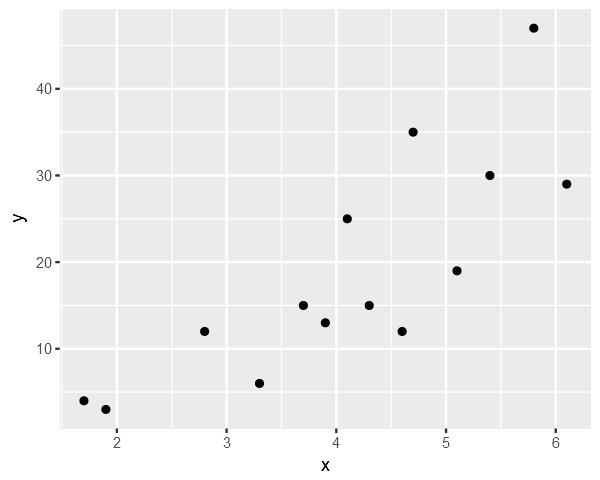

In [164]:
gp.d5 <- ggplot(d5, aes(x, y)) + geom_point()
gp.d5

In [158]:
res.d5 <- glm(y ~ x, data=d5, family=quasipoisson)

In [159]:
summary(res.d5)


Call:
glm(formula = y ~ x, family = quasipoisson, data = d5)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0051  -1.3342  -0.4587   0.9368   2.7362  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.82642    0.45234   1.827 0.092664 .  
x            0.47401    0.09223   5.139 0.000245 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for quasipoisson family taken to be 2.676269)

    Null deviance: 112.070  on 13  degrees of freedom
Residual deviance:  31.287  on 12  degrees of freedom
AIC: NA

Number of Fisher Scoring iterations: 4


In [162]:
d5.pred <- data.frame(x = seq(0, 7, 0.01)) %>% mutate(y = exp(coef(res.d5)["(Intercept)"] + coef(res.d5)["x"] * x))
head(d5.pred)

x,y
0.00,2.285124
0.01,2.295981
0.02,2.306890
0.03,2.317851
0.04,2.328864
0.05,2.339929


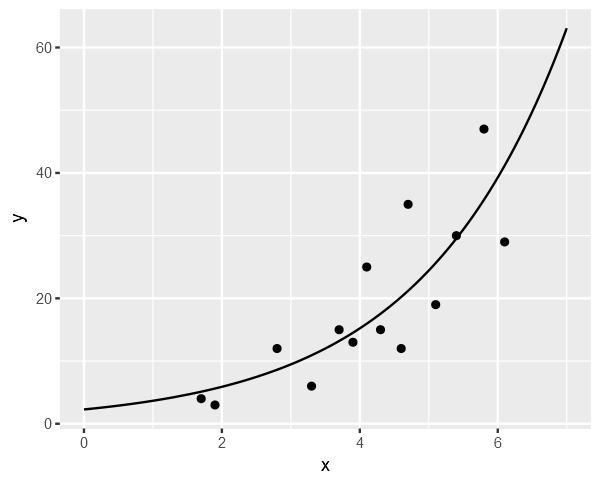

In [165]:
gp.d5.pred <- geom_line(data=d5.pred, mapping=aes(x, y))
gp.d5 + gp.d5.pred

In [166]:
logLik(res.d5)

'log Lik.' NA (df=2)

In [167]:
res.d5.2 <- glm(y ~ x, data=d5, family=negative.binomial(1))
summary(res.d5.2)


Call:
glm(formula = y ~ x, family = negative.binomial(1), data = d5)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.47288  -0.37998  -0.07842   0.19559   0.52064  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.57813    0.36036   1.604    0.135    
x            0.52965    0.08275   6.400  3.4e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for Negative Binomial(1) family taken to be 0.1429218)

    Null deviance: 6.6697  on 13  degrees of freedom
Residual deviance: 1.6699  on 12  degrees of freedom
AIC: 110.07

Number of Fisher Scoring iterations: 4


In [169]:
res.d5.3 <- glm.nb(y ~ x, data=d5)
summary(res.d5.3)


Call:
glm.nb(formula = y ~ x, data = d5, init.theta = 14.70278711, 
    link = log)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.3548  -0.9264  -0.2770   0.7112   1.6402  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.70367    0.38475   1.829   0.0674 .  
x            0.50145    0.08319   6.028 1.66e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for Negative Binomial(14.7028) family taken to be 1)

    Null deviance: 51.593  on 13  degrees of freedom
Residual deviance: 13.224  on 12  degrees of freedom
AIC: 93.5

Number of Fisher Scoring iterations: 1


              Theta:  14.70 
          Std. Err.:  9.99 

 2 x log-likelihood:  -87.50 

In [170]:
d5.pred.2 <- data.frame(x = d5.pred$x) %>% 
    mutate(y = exp(coef(res.d5.2)["(Intercept)"] + coef(res.d5.2)["x"] * x))
head(d5.pred.2)

x,y
0.00,1.782699
0.01,1.792167
0.02,1.801684
0.03,1.811252
0.04,1.820871
0.05,1.830541


In [171]:
d5.pred.3 <- data.frame(x = d5.pred$x) %>% 
    mutate(y = exp(coef(res.d5.3)["(Intercept)"] + coef(res.d5.3)["x"] * x))
head(d5.pred.3)

x,y
0.00,2.021154
0.01,2.031315
0.02,2.041526
0.03,2.051789
0.04,2.062104
0.05,2.072470


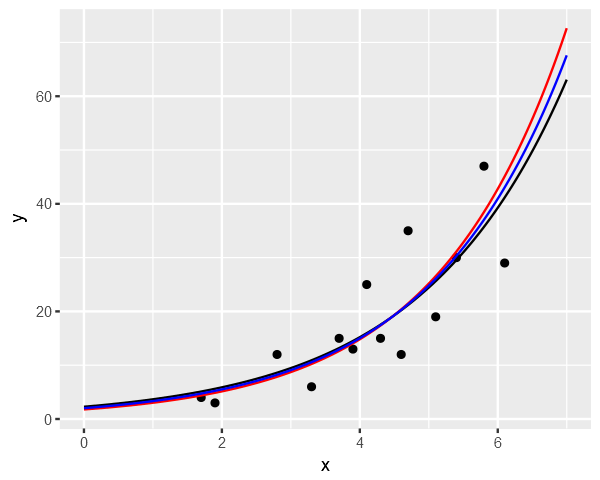

In [173]:
gp.d5.pred.2 <- geom_line(data=d5.pred.2, mapping=aes(x, y), colour="red")
gp.d5.pred.3 <- geom_line(data=d5.pred.3, mapping=aes(x, y), colour="blue")

gp.d5 + list(gp.d5.pred, gp.d5.pred.2, gp.d5.pred.3)

## 11.6

In [174]:
devtools::session_info()

Session info -------------------------------------------------------------------
Packages -----------------------------------------------------------------------


 setting  value                       
 version  R version 3.3.2 (2016-10-31)
 system   x86_64, mingw32             
 ui       RTerm                       
 language en                          
 collate  Japanese_Japan.932          
 tz       Asia/Tokyo                  
 date     2017-07-18                  

 package    * version    date       source                            
 assertthat   0.2.0      2017-04-11 CRAN (R 3.3.2)                    
 bindr        0.1        2016-11-13 CRAN (R 3.3.3)                    
 bindrcpp   * 0.1        2016-12-11 CRAN (R 3.3.3)                    
 Cairo        1.5-9      2015-09-26 CRAN (R 3.2.2)                    
 colorspace   1.3-2      2016-12-14 CRAN (R 3.3.3)                    
 crayon       1.3.2      2016-06-28 CRAN (R 3.3.1)                    
 devtools     1.12.0     2016-06-24 CRAN (R 3.3.1)                    
 digest       0.6.12     2017-01-27 CRAN (R 3.3.3)                    
 dplyr      * 0.7.0      2017-06-09 CRAN (R 3.3.